In [40]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import dates

In [41]:
# importing data into pandas dataframe and creating a copy
source_data = pd.read_csv('footballers-birthmonths.csv')
df = source_data.copy()

In [42]:
# viewing data
df.head()

,Player,Club,Nationality,Birthday
0,Shane Duffy,Brighton,Irish,1900-01-01
1,Jonny Evans,West Brom,Northern Irish,1900-01-02
2,James Milner,Liverpool,English,1900-01-04
3,Toni Kroos,Real Madrid,German,1900-01-04
4,Andy Carroll,West Ham,English,1900-01-06


In [43]:
# converting Birthday column to datetime
df['Birthday'] = pd.to_datetime(df['Birthday'])

In [44]:
# dropping unneccesary columns
df = df.drop(['Club','Nationality'],axis=1)

In [45]:
# grouping by month and counting #of players
month_df =  df.groupby(pd.Grouper(key='Birthday',axis=0,freq='M')).count()

In [46]:
# viewing data
month_df

,Player
Birthday,
1900-01-31,32
1900-02-28,25
1900-03-31,27
1900-04-30,19
1900-05-31,27
1900-06-30,18
1900-07-31,18
1900-08-31,21
1900-09-30,23


<BarContainer object of 12 artists>

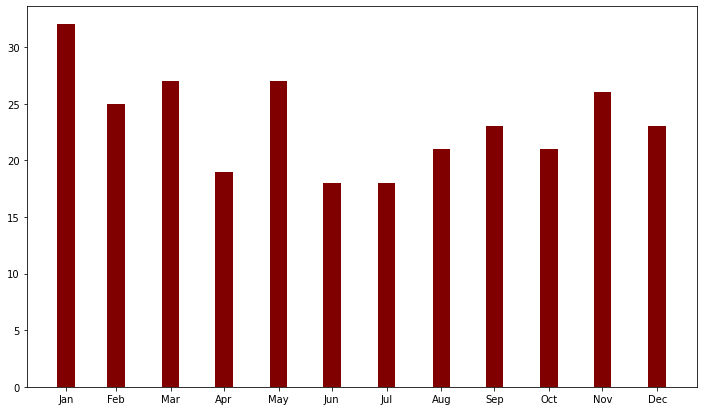

In [47]:
# visualizing monthly data
fig = plt.figure(figsize=(12, 7))
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_df.index,labels)
plt.bar(month_df.index, month_df.Player,width=10, color = 'maroon')

In [48]:
# adding quarters to the df
quarters = []
for i in range(1,4):
    for j in range(1,5):
        quarters.append(j)
quarters.sort()
quarters

[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4]

In [49]:
# viewing data
month_df['Quarter'] = quarters
month_df

,Player,Quarter
Birthday,,
1900-01-31,32,1
1900-02-28,25,1
1900-03-31,27,1
1900-04-30,19,2
1900-05-31,27,2
1900-06-30,18,2
1900-07-31,18,3
1900-08-31,21,3
1900-09-30,23,3


In [50]:
# sum of data per quarter
qdf = month_df.groupby(['Quarter']).sum()

In [51]:
# viewing data
qdf

,Player
Quarter,
1,84
2,64
3,62
4,70


<BarContainer object of 4 artists>

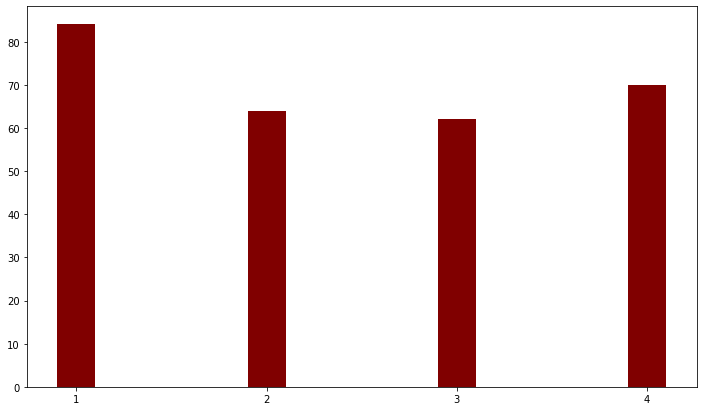

In [52]:
# visualizing quarterly data
fig = plt.figure(figsize=(12, 7))
plt.xticks(qdf.index, qdf.index)
plt.bar(qdf.index, qdf.Player, width=0.2, color='maroon')

In [53]:
# calculating % of players born in the first quarter and first half of the year
total = month_df.sum()
totalplayers = total.Player
firstq = qdf.iloc[0].sum()
firsth = qdf.iloc[0:2].sum()
firsth = firsth[0]

print(f'{firstq/totalplayers:.2%} of players are born in the first quarter of the year.')
print(f'{firsth/totalplayers:.2%} of players are born in the first half of the year.')

30.00% of players are born in the first quarter of the year.
52.86% of players are born in the first half of the year.


In [54]:
# setting index for df and creating a dummy column for visualization
dfp = df.set_index('Birthday')
dfp['Dummy'] = 1

In [55]:
# viewing data
dfp

,Player,Dummy
Birthday,,
1900-01-01,Shane Duffy,1
1900-01-02,Jonny Evans,1
1900-01-04,James Milner,1
1900-01-04,Toni Kroos,1
1900-01-06,Andy Carroll,1
...,...,...
1900-12-20,Kylian Mbappe,1
1900-12-26,Aaron Ramsey,1
1900-12-26,Hugo Lloris,1


<BarContainer object of 280 artists>

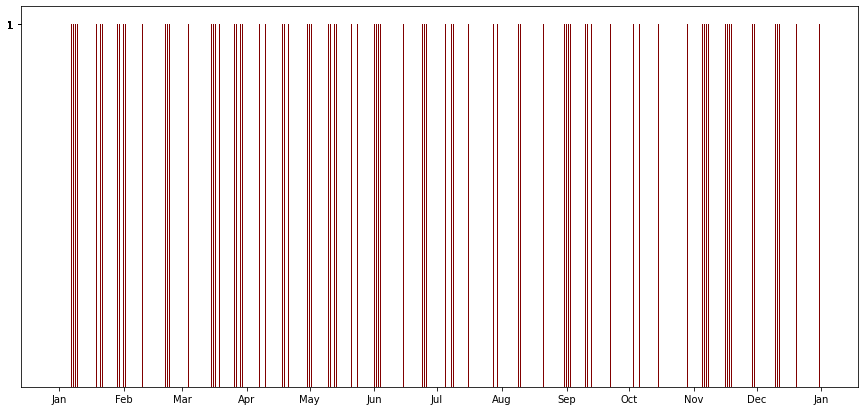

In [56]:
# visualizing data 
fig, ax = plt.subplots(1,1,figsize=(15, 7))
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.yticks(dfp.Dummy)
plt.bar(dfp.index, dfp.Dummy,width=0.2, color = 'maroon')

To-do
- add data callouts for last graph